In [1]:
#from astropy.io import fits
#import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import pandas as pd
#from astropy.table import Table
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read Processed Data

In [2]:
data = pd.read_csv('/home/savannahgramze/blue_ast7939/class_data/data.csv')
data = data.drop(data.columns[0], axis=1)
data

,Geometry,Sphere Masses,Line-of-Sight Masses,1mm Flux,3mm Flux
0,spu-smi,8.387212e-03,8.387187e-03,0.046890,0.002987
1,spu-smi,8.387212e-03,8.387187e-03,0.046897,0.002988
2,spu-smi,8.387212e-03,8.387187e-03,0.046906,0.002989
3,spu-smi,8.387212e-03,8.387187e-03,0.046842,0.002985
4,spu-smi,8.387212e-03,8.387187e-03,0.046829,0.002986
...,...,...,...,...,...
1819995,s-u-hmi,2.164075e-07,1.656944e-07,2653.982178,139.594757
1819996,s-u-hmi,2.164075e-07,1.656944e-07,2655.380859,139.690445
1819997,s-u-hmi,2.164075e-07,1.656944e-07,2662.449219,140.157257
1819998,s-u-hmi,2.164075e-07,1.656944e-07,2662.356201,140.145111


In [3]:
pd.set_option('use_inf_as_na', True)

In [4]:
data['log10 SphM'] = np.log10(data['Sphere Masses'])
data['log10 LOSM'] = np.log10(data['Line-of-Sight Masses'])
data['log10 1mm'] = np.log10(data['1mm Flux'])
data['log10 3mm'] = np.log10(data['3mm Flux'])

/apps/tensorflow/2.7.0/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
data

,Geometry,Sphere Masses,Line-of-Sight Masses,1mm Flux,3mm Flux,log10 SphM,log10 LOSM,log10 1mm,log10 3mm
0,spu-smi,8.387212e-03,8.387187e-03,0.046890,0.002987,-2.076382,-2.076384,-1.328917,-2.524771
1,spu-smi,8.387212e-03,8.387187e-03,0.046897,0.002988,-2.076382,-2.076384,-1.328859,-2.524659
2,spu-smi,8.387212e-03,8.387187e-03,0.046906,0.002989,-2.076382,-2.076384,-1.328772,-2.524458
3,spu-smi,8.387212e-03,8.387187e-03,0.046842,0.002985,-2.076382,-2.076384,-1.329364,-2.525043
4,spu-smi,8.387212e-03,8.387187e-03,0.046829,0.002986,-2.076382,-2.076384,-1.329485,-2.524934
...,...,...,...,...,...,...,...,...,...
1819995,s-u-hmi,2.164075e-07,1.656944e-07,2653.982178,139.594757,-6.664728,-6.780692,3.423898,2.144869
1819996,s-u-hmi,2.164075e-07,1.656944e-07,2655.380859,139.690445,-6.664728,-6.780692,3.424127,2.145167
1819997,s-u-hmi,2.164075e-07,1.656944e-07,2662.449219,140.157257,-6.664728,-6.780692,3.425281,2.146616
1819998,s-u-hmi,2.164075e-07,1.656944e-07,2662.356201,140.145111,-6.664728,-6.780692,3.425266,2.146578


In [6]:
df = data.dropna().reset_index(drop=True)
df

,Geometry,Sphere Masses,Line-of-Sight Masses,1mm Flux,3mm Flux,log10 SphM,log10 LOSM,log10 1mm,log10 3mm
0,spu-smi,8.387212e-03,8.387187e-03,0.046890,0.002987,-2.076382,-2.076384,-1.328917,-2.524771
1,spu-smi,8.387212e-03,8.387187e-03,0.046897,0.002988,-2.076382,-2.076384,-1.328859,-2.524659
2,spu-smi,8.387212e-03,8.387187e-03,0.046906,0.002989,-2.076382,-2.076384,-1.328772,-2.524458
3,spu-smi,8.387212e-03,8.387187e-03,0.046842,0.002985,-2.076382,-2.076384,-1.329364,-2.525043
4,spu-smi,8.387212e-03,8.387187e-03,0.046829,0.002986,-2.076382,-2.076384,-1.329485,-2.524934
...,...,...,...,...,...,...,...,...,...
1596326,s-u-hmi,2.164075e-07,1.656944e-07,2653.982178,139.594757,-6.664728,-6.780692,3.423898,2.144869
1596327,s-u-hmi,2.164075e-07,1.656944e-07,2655.380859,139.690445,-6.664728,-6.780692,3.424127,2.145167
1596328,s-u-hmi,2.164075e-07,1.656944e-07,2662.449219,140.157257,-6.664728,-6.780692,3.425281,2.146616
1596329,s-u-hmi,2.164075e-07,1.656944e-07,2662.356201,140.145111,-6.664728,-6.780692,3.425266,2.146578


In [7]:
for col in df.columns:
    try: 
        print(col, np.sum(np.isnan(df[col])))
    except: 
        print(col)

Geometry
Sphere Masses 0
Line-of-Sight Masses 0
1mm Flux 0
3mm Flux 0
log10 SphM 0
log10 LOSM 0
log10 1mm 0
log10 3mm 0


# Divide into Training, Testing, Validation 

In [8]:
X = np.array([df['log10 1mm'], df['log10 3mm']]).T
X.shape

(1596331, 2)

In [9]:
y = np.array(df['log10 SphM'])
#y = np.array(df['log10 LOSM'])
y.shape

(1596331,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## First split off 30% of the data for validation+testing
#X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.3, shuffle=True)
#
## Then divide this subset into training and testing sets
#X_valid, X_test, y_valid, y_test = train_test_split(X_split, y_split, test_size=0.666, shuffle=True)

In [11]:
normalizer = keras.layers.Normalization(axis=-1)

In [12]:
normalizer.adapt(np.array(X_train))

2023-04-17 12:31:45.170008: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 12:31:45.693659: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0


# Build and Compile the NN

In [13]:
def build_and_compile_model(norm):
    model = keras.Sequential([norm,
                              layers.Dense(100, activation='relu'),
                              layers.Dense(100, activation='relu'),
                              layers.Dense(1)])
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=0.5)
                 )
    return model

In [14]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,506
Trainable params: 10,501
Non-trainable params: 5
_________________________________________________________________


# Train the NN

In [15]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

In [17]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    #verbose=0, 
    epochs=100,
    callbacks=[checkpoint_cb, early_stopping_cb],
    shuffle=True,
    verbose=True,
    #validation_data=(X_valid, y_valid),
    use_multiprocessing=True)

Epoch 1/100
  117/29932 [..............................] - ETA: 38s - loss: 9.5259 

2023-04-17 12:32:05.566415: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


29932/29932 [==============================] - 47s 2ms/step - loss: 3.2928 - val_loss: 2.1926
Epoch 2/100
29932/29932 [==============================] - 44s 1ms/step - loss: 2.0223 - val_loss: 1.9038
Epoch 3/100
29932/29932 [==============================] - 45s 2ms/step - loss: 1.7994 - val_loss: 1.7687
Epoch 4/100
29932/29932 [==============================] - 44s 1ms/step - loss: 1.7316 - val_loss: 1.6682
Epoch 5/100
29932/29932 [==============================] - 43s 1ms/step - loss: 1.7076 - val_loss: 1.6401
Epoch 6/100
29932/29932 [==============================] - 45s 2ms/step - loss: 1.6970 - val_loss: 1.7522
Epoch 7/100
29932/29932 [==============================] - 43s 1ms/step - loss: 1.6908 - val_loss: 1.6775
Epoch 8/100
29932/29932 [==============================] - 43s 1ms/step - loss: 1.6804 - val_loss: 1.6872
Epoch 9/100
29932/29932 [==============================] - 45s 2ms/step - loss: 1.6679 - val_loss: 1.6842
Epoch 10/100
29932/29932 [==============================] 

In [18]:
dnn_model.save("/home/savannahgramze/blue_ast7939/class_data/models/nn_model_10.tf", save_format='tf')
#dnn_model.save("/home/savannahgramze/blue_ast7939/class_data/models/nn_model_los_1.tf", save_format='tf')

2023-04-17 12:20:23.788549: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/savannahgramze/blue_ast7939/class_data/models/nn_model_10.tf/assets


In [19]:
#dnn_model.save("/home/savannahgramze/blue_ast7939/class_data/models/nn_model_9.h5", save_format='h5')

# Evaluate the NN

In [20]:
dnn_model_o = keras.models.load_model("/home/savannahgramze/blue_ast7939/class_data/models/nn_model_9.tf")

In [21]:
#dnn_model_h = keras.models.load_model("/home/savannahgramze/blue_ast7939/class_data/models/nn_model_9.h5")

In [22]:
y_prediction = dnn_model.predict(X_test)
y_prediction

array([[-2.5856218],
       [ 4.869606 ],
       [-2.6059532],
       ...,
       [ 0.7754859],
       [-1.1049439],
       [ 2.0564027]], dtype=float32)

In [23]:
linear = np.geomspace(0.01, 2.5*10**7, num=10)

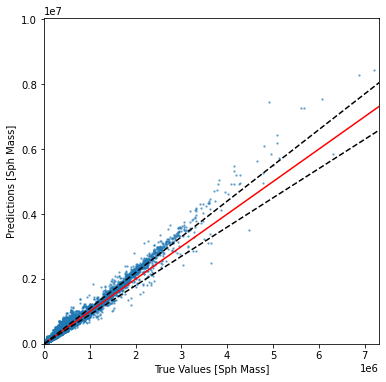

In [24]:
plt.figure(figsize=(6,6))
#plt.axes(aspect='equal')
plt.scatter(10**y_test, 10**y_prediction, 2, alpha=0.5)
#plt.scatter()
plt.xlabel('True Values [Sph Mass]')
plt.ylabel('Predictions [Sph Mass]')
plt.plot(linear, linear, color='red')
outlier_plus = linear + 0.1*(1+linear)
outlier_minus = linear - 0.1*(1+linear)
plt.plot(linear, outlier_plus, color='k', linestyle='dashed')
plt.plot(linear, outlier_minus, color='k', linestyle='dashed')
#lims = [0, 1.75e7]
plt.xlim(left=0, right=np.max(10**y_test))
plt.ylim(bottom=0, top=np.max(10**y_prediction))
#plt.xscale('log')
#plt.yscale('log')
#_ = plt.plot(lims, lims)
plt.savefig('./plots/mass_sph_compare.png')

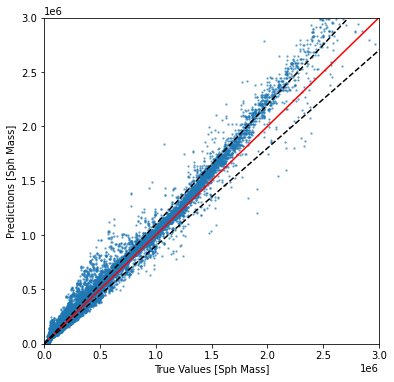

In [25]:
plt.figure(figsize=(6,6))
#plt.axes(aspect='equal')
plt.scatter(10**y_test, 10**y_prediction, 2, alpha=0.5)
#plt.scatter()
plt.xlabel('True Values [Sph Mass]')
plt.ylabel('Predictions [Sph Mass]')
plt.plot(linear, linear, color='red')
outlier_plus = linear + 0.1*(1+linear)
outlier_minus = linear - 0.1*(1+linear)
plt.plot(linear, outlier_plus, color='k', linestyle='dashed')
plt.plot(linear, outlier_minus, color='k', linestyle='dashed')
#lims = [0, 1.75e7]
plt.xlim(left=0, right=3e6) #right=np.max(10**y_test))
plt.ylim(bottom=0, top=3e6) #top=np.max(10**y_prediction))
#plt.xscale('log')
#plt.yscale('log')
#_ = plt.plot(lims, lims)
plt.savefig('./plots/mass_sph_compare_zoom.png')

In [26]:
import matplotlib.colors as colors

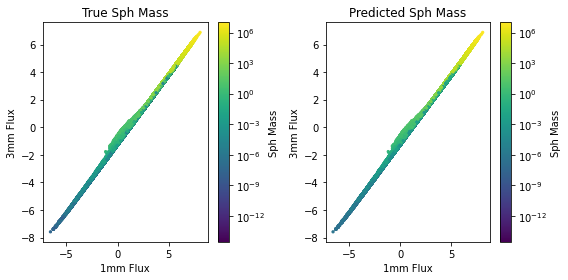

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axs = axes.flatten()

vmin = np.min(10**y_prediction)
vmax = np.max(10**y_prediction)

norm = colors.LogNorm(vmin=vmin, vmax=vmax)

zl_plot_1 = axs[0].scatter(X_test.T[0], X_test.T[1], 5, c=10**y_test, norm=norm)
axs[0].set_title('True Sph Mass')
axs[0].set_xlabel('1mm Flux')
axs[0].set_ylabel('3mm Flux')
cbar = plt.colorbar(zl_plot_1, ax=axs[0])
cbar.set_label('Sph Mass')

zl_plot_2 = axs[1].scatter(X_test.T[0], X_test.T[1], 5, c=10**y_prediction, norm=norm)
axs[1].set_title('Predicted Sph Mass')
axs[1].set_xlabel('1mm Flux')
axs[1].set_ylabel('3mm Flux')
cbar = plt.colorbar(zl_plot_2, ax=axs[1])
cbar.set_label('Sph Mass')

fig.tight_layout()
plt.savefig('./plots/allgeos_fluxpredmass.png')

In [28]:
# loss, 
accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)

In [29]:
accuracy

1.6446119546890259

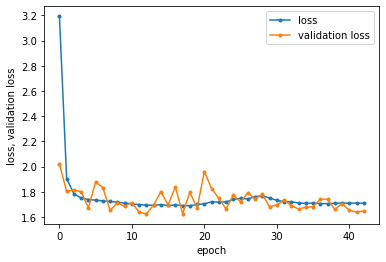

In [30]:
plt.plot(history.epoch, history.history['loss'],'.-', label='loss')
plt.plot(history.epoch, history.history['val_loss'],'.-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')
plt.legend()
plt.savefig('./plots/lossval.png')

# Testing per Geometry

In [31]:
df['Geometry'].unique()

array(['spu-smi', 's-u-smi', 's-pbhmi', 's-p-smi', 's-pbsmi', 'spubhmi',
       's-ubhmi', 's-p-hmi', 'spubsmi', 's-ubsmi', 'spu-hmi', 's-u-hmi'],
      dtype=object)

In [32]:
df.loc[df['Geometry'] == 'spu-smi']

,Geometry,Sphere Masses,Line-of-Sight Masses,1mm Flux,3mm Flux,log10 SphM,log10 LOSM,log10 1mm,log10 3mm
0,spu-smi,0.008387,0.008387,0.046890,0.002987,-2.076382,-2.076384,-1.328917,-2.524771
1,spu-smi,0.008387,0.008387,0.046897,0.002988,-2.076382,-2.076384,-1.328859,-2.524659
2,spu-smi,0.008387,0.008387,0.046906,0.002989,-2.076382,-2.076384,-1.328772,-2.524458
3,spu-smi,0.008387,0.008387,0.046842,0.002985,-2.076382,-2.076384,-1.329364,-2.525043
4,spu-smi,0.008387,0.008387,0.046829,0.002986,-2.076382,-2.076384,-1.329485,-2.524934
...,...,...,...,...,...,...,...,...,...
79371,spu-smi,1.587513,1.587601,23866.808594,1254.251099,0.200717,0.200741,4.377794,3.098384
79372,spu-smi,1.587513,1.587601,23077.843750,1207.075439,0.200717,0.200741,4.363195,3.081734
79373,spu-smi,1.587513,1.587601,22893.148438,1202.093628,0.200717,0.200741,4.359706,3.079938
79374,spu-smi,1.587513,1.587601,22990.677734,1211.865479,0.200717,0.200741,4.361552,3.083454


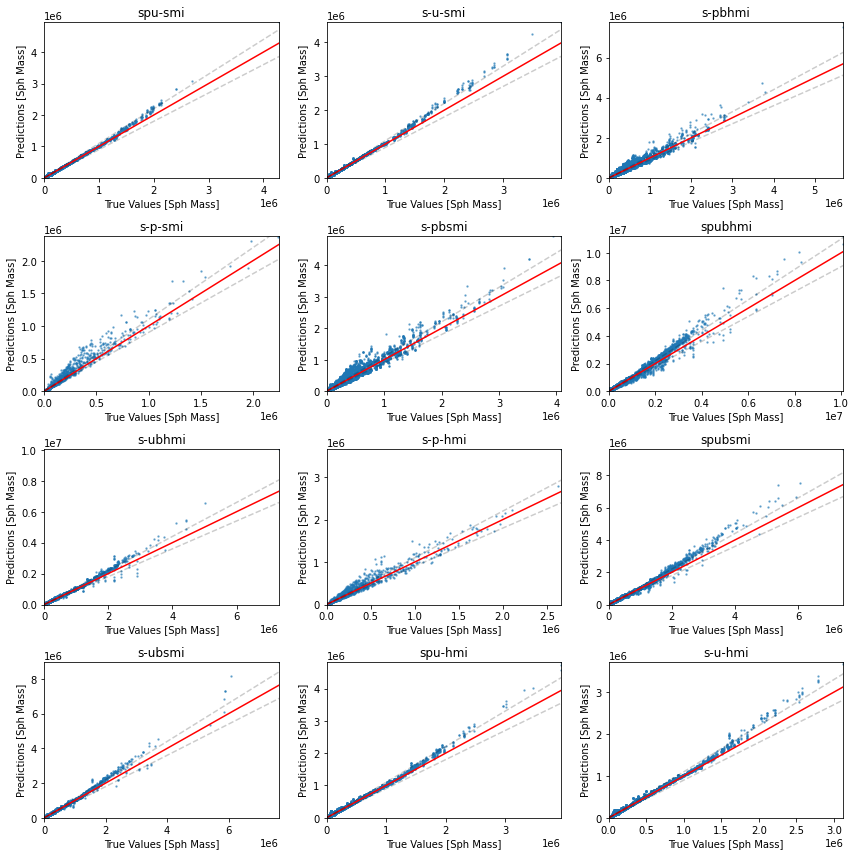

In [33]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()
ii = 0

for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    X_geo = np.array([df_geo['log10 1mm'], df_geo['log10 3mm']]).T
    y_geo = np.array(df_geo['log10 SphM'])
    pred = dnn_model.predict(X_geo)
    axs[ii].scatter(10**y_geo, 10**pred, 2, alpha=0.5)
    axs[ii].set_xlabel('True Values [Sph Mass]')
    axs[ii].set_ylabel('Predictions [Sph Mass]')
    axs[ii].set_xlim(left=0, right=np.max(10**y_geo))
    axs[ii].set_ylim(bottom=0, top=np.max(10**pred))
    axs[ii].plot(linear, linear, color='red')
    outlier_plus = linear + 0.1*(1+linear)
    outlier_minus = linear - 0.1*(1+linear)
    axs[ii].plot(linear, outlier_plus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].plot(linear, outlier_minus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].set_title(geo)
    ii += 1
fig.tight_layout()
plt.savefig('./plots/allgeos_masscompare.png')

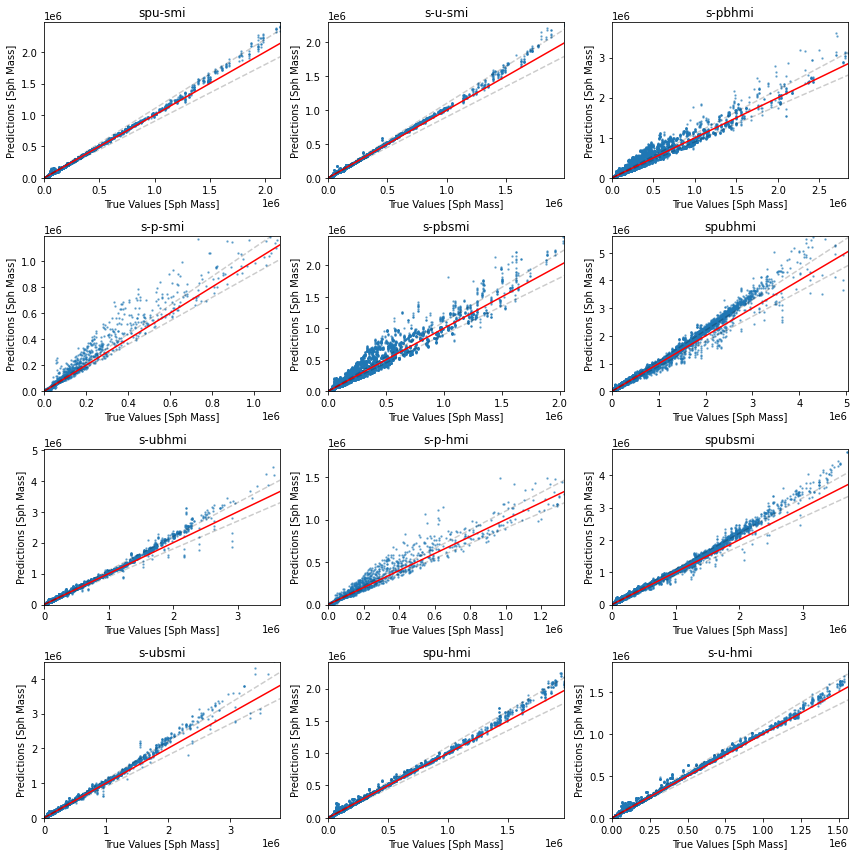

In [34]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()
ii = 0

for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    X_geo = np.array([df_geo['log10 1mm'], df_geo['log10 3mm']]).T
    y_geo = np.array(df_geo['log10 SphM'])
    pred = dnn_model.predict(X_geo)
    axs[ii].scatter(10**y_geo, 10**pred, 2, alpha=0.5)
    axs[ii].set_xlabel('True Values [Sph Mass]')
    axs[ii].set_ylabel('Predictions [Sph Mass]')
    axs[ii].set_xlim(left=0, right=np.max(10**y_geo)/2)
    axs[ii].set_ylim(bottom=0, top=np.max(10**pred)/2)
    axs[ii].plot(linear, linear, color='red')
    outlier_plus = linear + 0.1*(1+linear)
    outlier_minus = linear - 0.1*(1+linear)
    axs[ii].plot(linear, outlier_plus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].plot(linear, outlier_minus, color='k', linestyle='dashed', alpha=0.2)
    axs[ii].set_title(geo)
    ii += 1
fig.tight_layout()
plt.savefig('./plots/allgeos_masscompare_zoom.png')

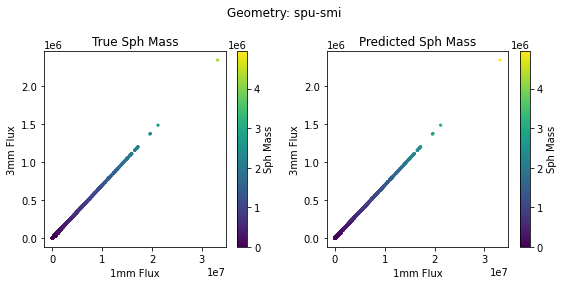

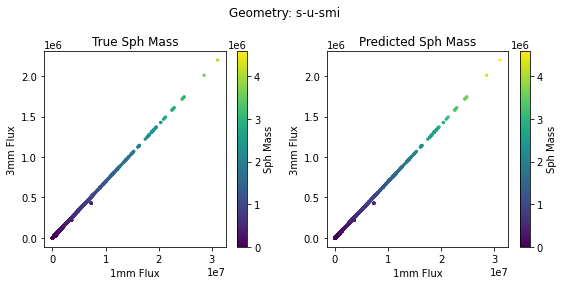

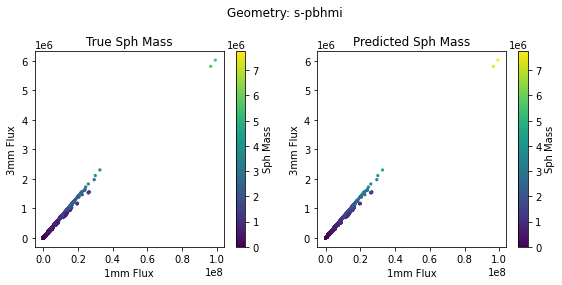

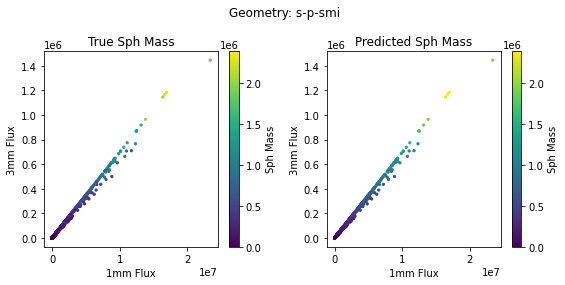

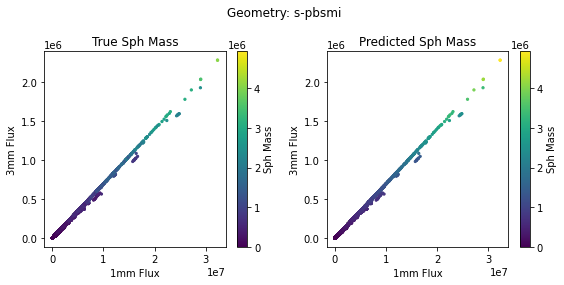

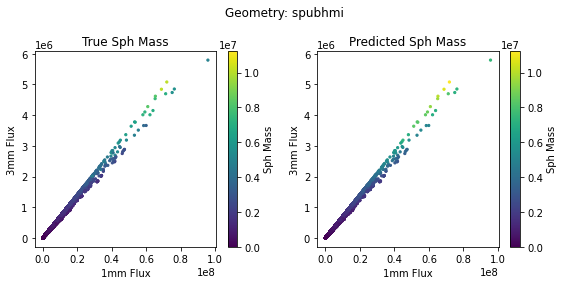

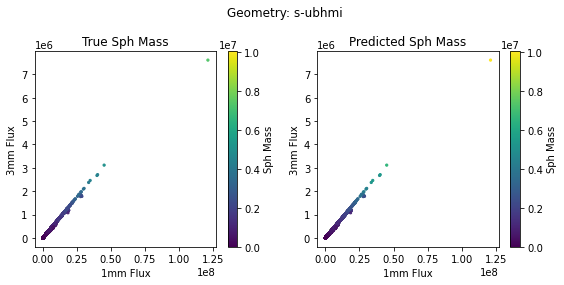

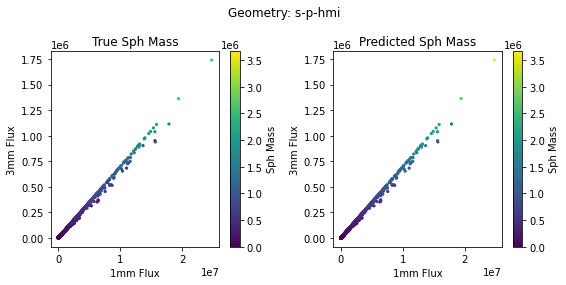

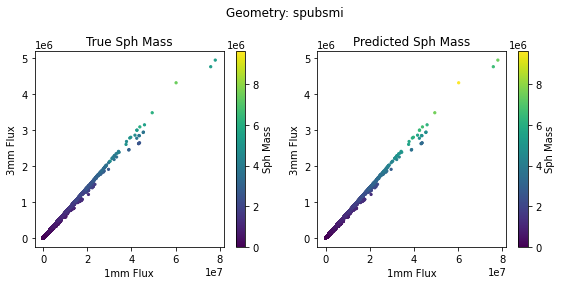

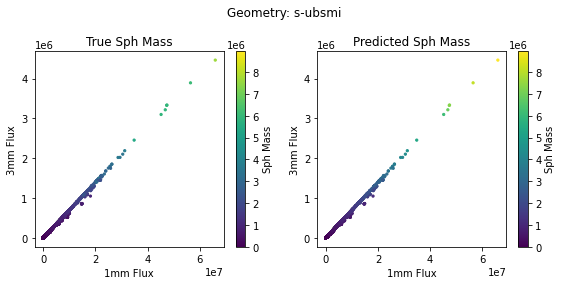

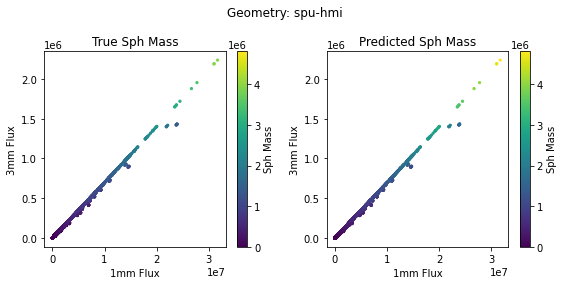

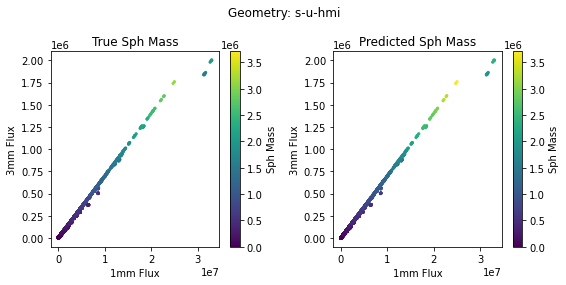

In [35]:
for geo in df['Geometry'].unique():
    df_geo = df.loc[df['Geometry'] == geo]
    X_geo = np.array([df_geo['log10 1mm'], df_geo['log10 3mm']]).T
    y_geo = np.array(df_geo['log10 SphM'])
    pred = dnn_model.predict(X_geo)

    fig, axes = plt.subplots(1, 2, figsize=(8,4))
    axs = axes.flatten()

    vmin = np.min(10**pred)
    vmax = np.max(10**pred)
    
    norm = colors.Normalize(vmin=vmin, vmax=vmax)

    zl_plot_1 = axs[0].scatter(df_geo['1mm Flux'], df_geo['3mm Flux'], 5, c=df_geo['Sphere Masses'], norm=norm)
    axs[0].set_title('True Sph Mass')
    axs[0].set_xlabel('1mm Flux')
    axs[0].set_ylabel('3mm Flux')
    cbar = plt.colorbar(zl_plot_1, ax=axs[0])
    cbar.set_label('Sph Mass')

    zl_plot_2 = axs[1].scatter(df_geo['1mm Flux'], df_geo['3mm Flux'], 5, c=10**pred, norm=norm)
    axs[1].set_title('Predicted Sph Mass')
    axs[1].set_xlabel('1mm Flux')
    axs[1].set_ylabel('3mm Flux')
    cbar = plt.colorbar(zl_plot_2, ax=axs[1])
    cbar.set_label('Sph Mass')

    fig.suptitle('Geometry: ' + geo)
    fig.tight_layout()
    plt.savefig('./plots/' + geo + '_comparefluxmass.png')
    plt.show()


# Additional Figures

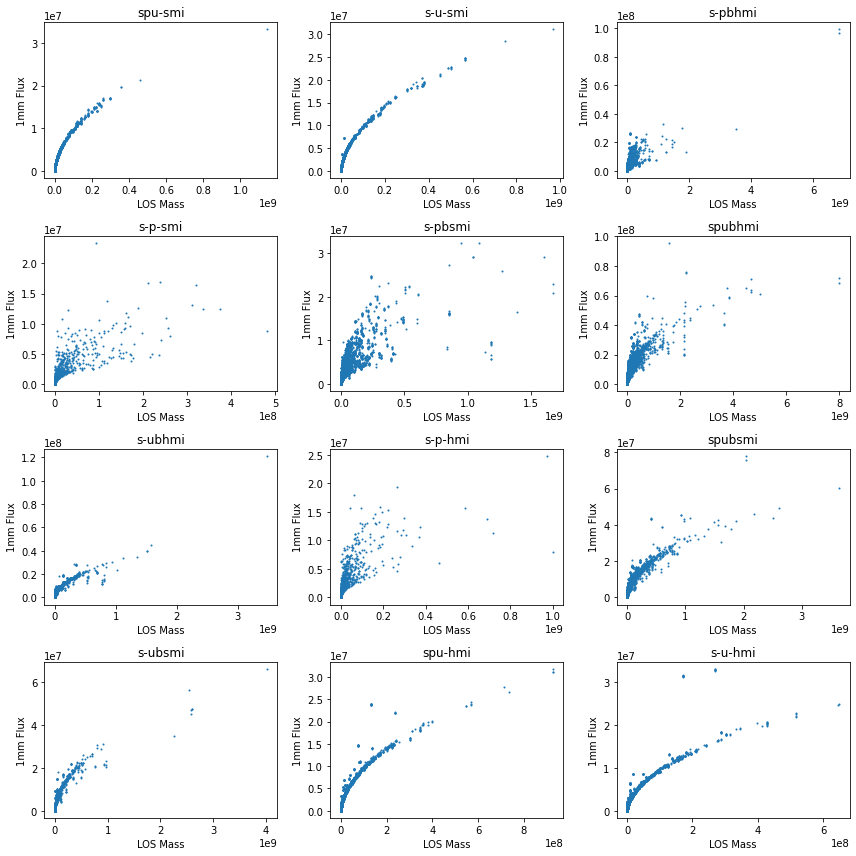

In [41]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('LOS Mass')
    axs[ii].set_ylabel('1mm Flux')
    axs[ii].scatter(masses_los, fluxes_1mm, 1)

fig.tight_layout()
plt.savefig('./plots/1mmlos.png')

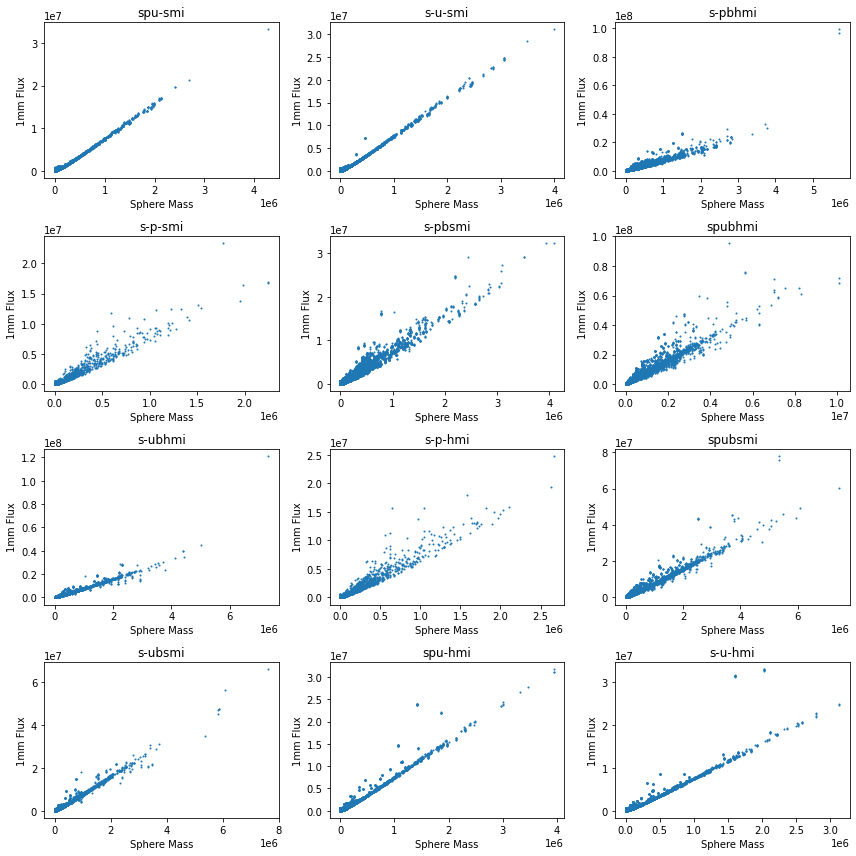

In [42]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('Sphere Mass')
    axs[ii].set_ylabel('1mm Flux')
    axs[ii].scatter(masses_sph, fluxes_1mm, 1)

fig.tight_layout()
plt.savefig('./plots/1mmsph.png')

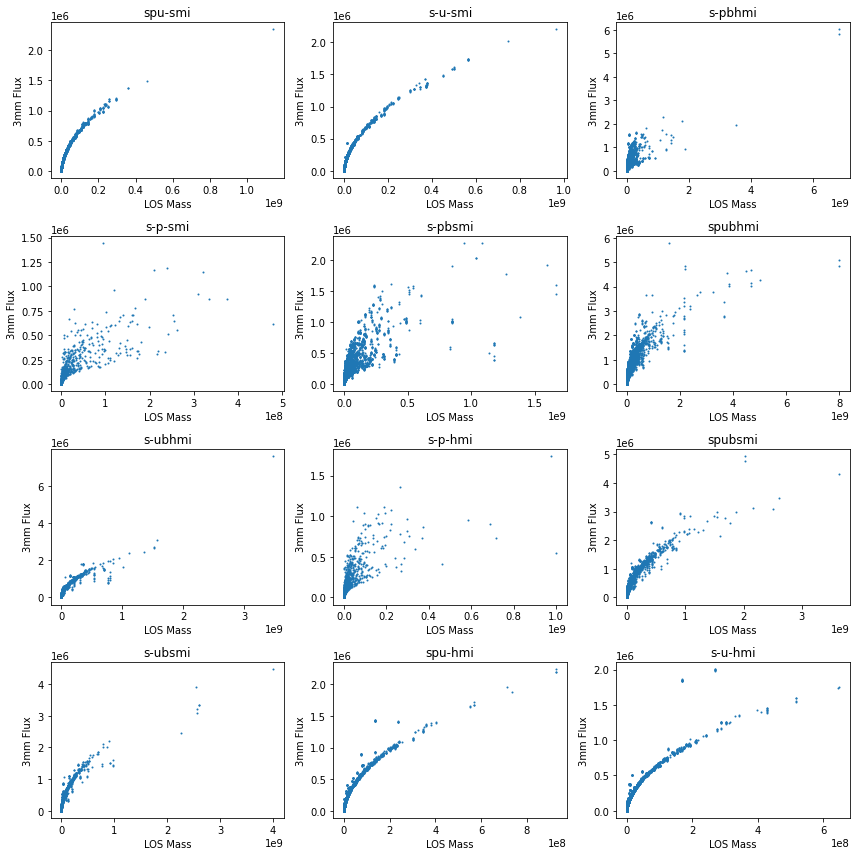

In [43]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('LOS Mass')
    axs[ii].set_ylabel('3mm Flux')
    axs[ii].scatter(masses_los, fluxes_3mm, 1)

fig.tight_layout()
plt.savefig('./plots/3mmlos.png')

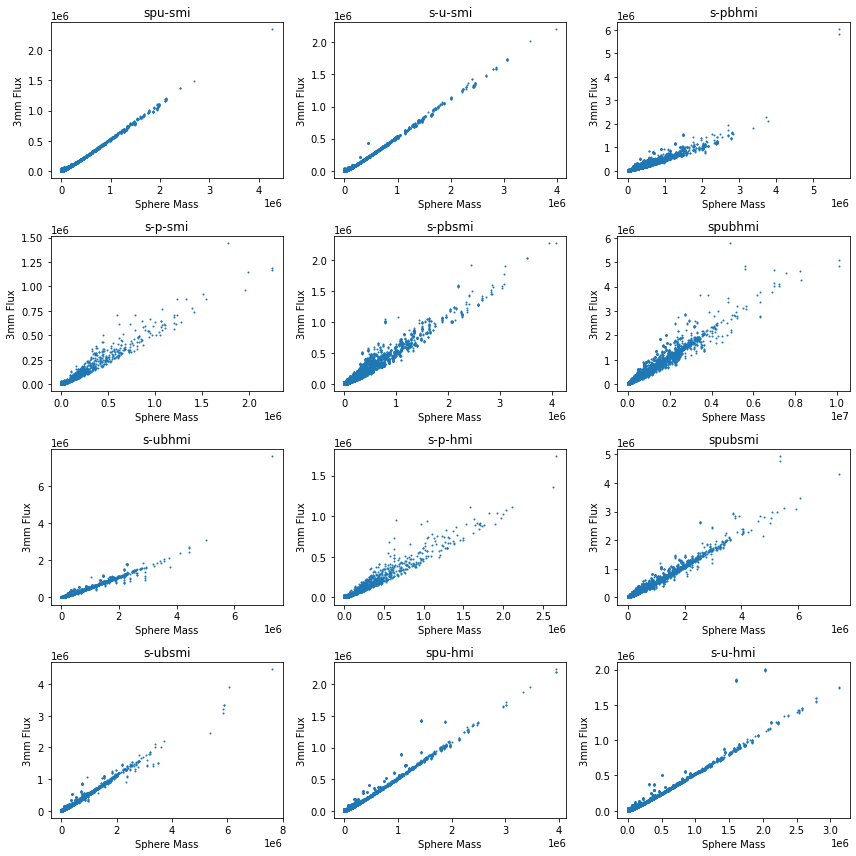

In [44]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('Sphere Mass')
    axs[ii].set_ylabel('3mm Flux')
    axs[ii].scatter(masses_sph, fluxes_3mm, 1)

fig.tight_layout()
plt.savefig('./plots/3mmsph.png')

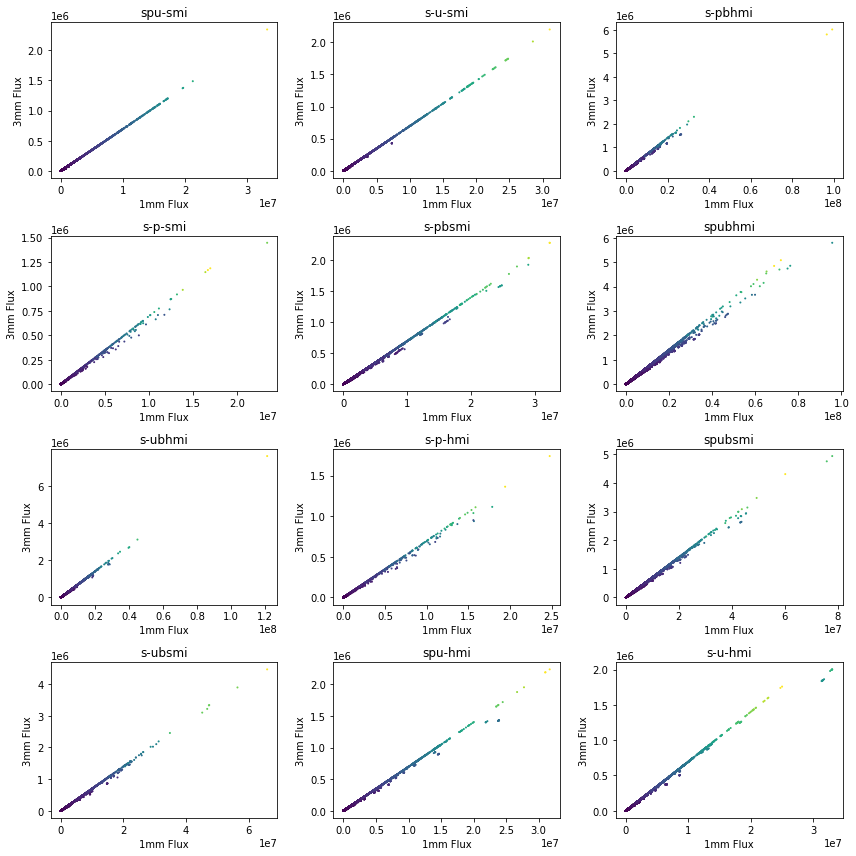

In [45]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

for ii in range(len(axs)):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    
    #axs[ii].set_xscale('log')
    #axs[ii].set_yscale('log')
    axs[ii].set_title(geo)
    axs[ii].set_xlabel('1mm Flux')
    axs[ii].set_ylabel('3mm Flux')
    axs[ii].scatter(fluxes_1mm, fluxes_3mm, 1, c=masses_sph)

fig.tight_layout()
plt.savefig('./plots/1mm3mm.png')

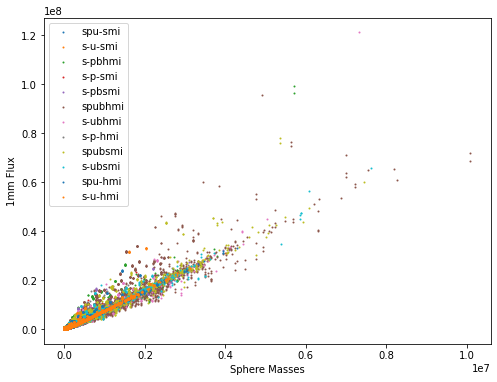

In [46]:
fig = plt.figure(figsize=(8,6))
for ii in range(12):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    plt.scatter(masses_sph, fluxes_1mm, 1, label=geo)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Sphere Masses')
plt.ylabel('1mm Flux')
plt.savefig('./plots/1mmsph_1plot.png')

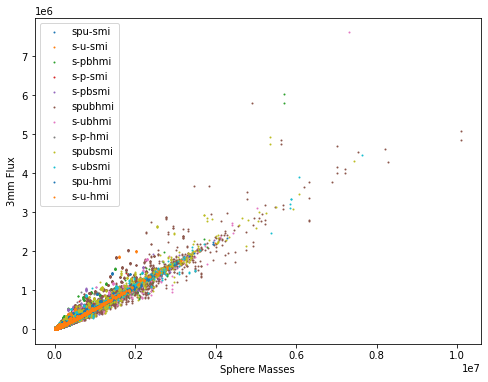

In [47]:
fig = plt.figure(figsize=(8,6))
for ii in range(12):
    geo = df['Geometry'].unique()[ii]
    df_geo = df.loc[df['Geometry'] == geo]
    masses_sph = df_geo['Sphere Masses']
    masses_los = df_geo['Line-of-Sight Masses']
    fluxes_1mm = df_geo['1mm Flux']
    fluxes_3mm = df_geo['3mm Flux']
    plt.scatter(masses_sph, fluxes_3mm, 1, label=geo)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Sphere Masses')
plt.ylabel('3mm Flux')
plt.savefig('./plots/3mmsph_1plot.png')